In [35]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import lmfit

In [36]:
with open('Data/cp-cal_data.txt','r') as tf:
    data = np.genfromtxt(tf).T

for i in range(len(data[1])):
    data[0][i]-= 704000

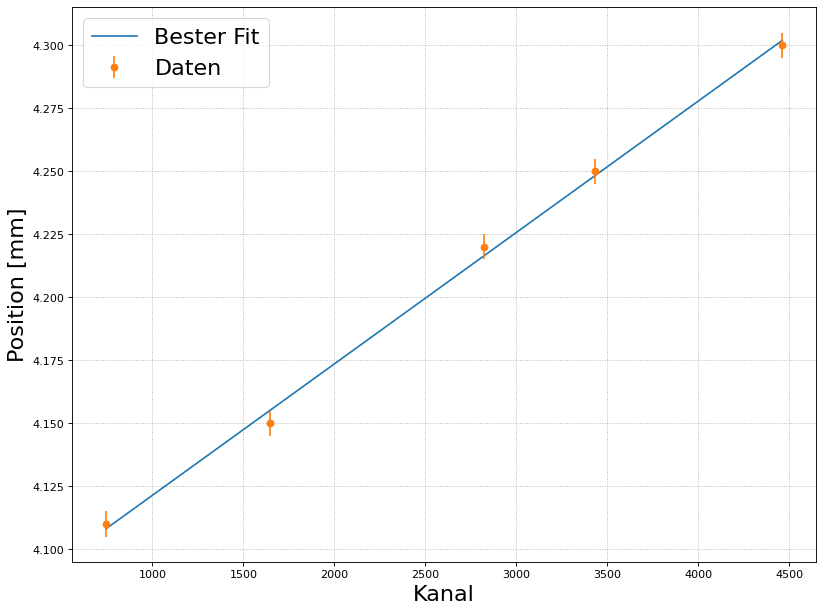

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 2
    chi-square         = 1.97612519
    reduced chi-square = 0.65870840
    Akaike info crit   = -0.64149980
    Bayesian info crit = -1.42262398
    R-squared          = -83.7395021
[[Variables]]
    slope:      5.2152e-05 +/- 1.3873e-06 (2.66%) (init = 5.21519e-05)
    intercept:  4.06923685 +/- 0.00406568 (0.10%) (init = 4.069237)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.895


In [39]:
f.figsize(1)

res = f.linfit(data[1],data[0],np.full(len(data[1]),0.005))
plt.plot(data[0],res.eval(x=data[0]),label='Bester Fit')
plt.errorbar(data[0],data[1],np.full(len(data[1]),0.005),fmt='o',label='Daten')
f.form(xlabel='Kanal',ylabel='Position [mm]',name='Res/A4_cpcal.pdf')
print(res.fit_report())

In [38]:
with open('Res/cp-cal_res.txt','w')as tf:
    tf.write(str(res.params['slope'].value)+'\t'+str(res.params['slope'].stderr)+'\t'+str(res.params['intercept'].value)+'\t'+str(res.params['intercept'].stderr))